In [14]:
import matplotlib.pyplot as plt

In [51]:
import numpy as np
from scipy.integrate import quadrature, quad

from numpy.polynomial.legendre import leggauss



sample, weights = leggauss(20)

def f(x):
    return x*np.exp(-x)
    



integral = 8*np.sum(f(8*sample)*weights)

integral

-20866.70892845587

\begin{equation}
r_i = \sqrt{x_i^2 + y_i^2 + z_i^2} 
\end{equation}

In [ ]:
def initfunc(x_1, x_2,y_1 y_2, ,z_1,z_2):
     return np.sqrt((x_1-x_2)**2 + (y_1-y_2)**2, + (z_1-z_2))
    

    

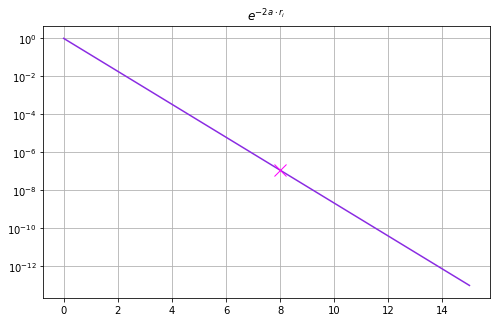

In [52]:
x = np.linspace(0, 15, 1000)

y = lambda x: np.exp(-2*x)

plt.figure(figsize=(8,5))
plt.title('$e^{-2a \cdot r_i}$')
plt.plot(x, y(x), color = 'blueviolet')
# plt.semilogx();
plt.semilogy();
plt.grid()
plt.plot(8,y(8), 'x', color = 'fuchsia', ms = 12)

We see that $e^{-2\alpha r_i} \approx 0$ when $\lambda = 7$ 